# 다양한 모델 평가 척도

### 현재 학습 모델의 정확도 불완전 척도 예시

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [7]:
digits_data[0]
# 64개의 데이터로 이루어짐.
# 이미지를 표현 8x8크기의 이미지 한장을 뜻함

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<function matplotlib.pyplot.show(close=None, block=None)>

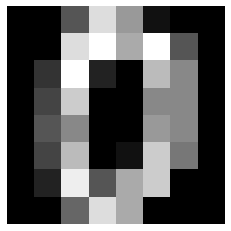

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
#이미지를 현 화면에 보여주도록 하는 코드

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show

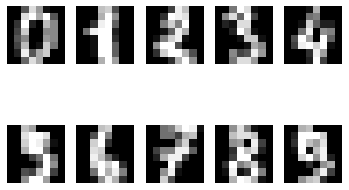

In [14]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()

In [16]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 여기서 1797개의 데이터로 구성되고 0~9까지의 숫자로 이미지가 구성되어있다.
#### 여기서 정확도의 함정을 확인하기 위해 새로운 타겟값을 지정하여 3만 출력하고 나머지는 0으로 출력하도록 한다

In [17]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
digits_data = digits.data
digits_label = digits.target

x_train, x_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size = 0.2,
                                                    random_state=15)

digits_result = DecisionTreeClassifier(random_state=15)
digits_result.fit(x_train, y_train)
y_pred = digits_result.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

#### 여기서 정확도는 93.888% 가 나왔다
#### 여기서 문제가 발생하는데 정답은 3 오답은 0으로 설정해놨기 때문이다.
#### 이 문제는 학습을 전혀 하지 않고 정답을 0으로 설정해도 정확도가 90%가 넘게 나오게 된다.

In [35]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

## 정확도 다양하게 평가해보기

## 오차 행렬(confusion matrix)

### 오차 행렬의 예측 결과 4개지
#### 1. TP : 양성일때 진짜 양성
#### 2. FP : 음성일때 가짜 양성
#### 3. TN : 음성일때 진짜 음성
#### 4. FN : 양성일때 가짜 음성
### 대표적 성능지표 3가지
#### 1. Sensitivity(재현율) = Recall : 클수록 좋음. 양성인데 음성으로 판단하는 경우가 적어야 한다.
#### 2. F1 Score : Racall 과 precision의 조화 평균
#### 3. Precision(정밀도) : 클수록 좋음. 음성인데 양성으로 판단하는 경우가 적어야 한다.

## sklearn으로 위 지표들 확인하는 법

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

#### 왼쪽 위부터 순서대로 TP, FN, FP, TN의 개수이다.
#### 현재 데이터에서는 0이 positive 3이 negative의 역할을 한다.

In [37]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [41]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



#### 보다싶이 333개의 0은 맞췄으나 27개의 3은 전혀 맞추지 못했다. 이는 큰 문제로 정확도만으로 판단하면 안된다

In [42]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

### 이렇게 정확도는 높으나 실제로는 불균형이 심하다는 걸 인지해야 한다.
### 특히, label이 불균형하게 분포되어있는 데이터를 다룰때는 더 조심